In [38]:
# %load features_comparison.py
import src.core as mlApi
from src.utils.plots import (plotModelPredictions, plotModelScores, getPlotColors)
from src.utils.prints import (printModelScores)
import matplotlib.pyplot as plt
import src.core_configs as configs

In [39]:
colors = getPlotColors()
models = ['A', 'B', 'C', 'D', 'E']

def featureComparison(
	irrelevantColumnsList,
	filename,
	columns,
	traintime,
	testtime,
	targetColumns,
	enrolWindow,
	):
	global colors, models

	columnsLists = []
	deviationsLists= []
	names = []
	trainmetrics = []
	testmetrics = []

	for i, irrelevantColumns in enumerate(irrelevantColumnsList):
		mlApi.reset()

		df = mlApi.initDataframe(filename, columns, irrelevantColumns)
		df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
		X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)
		
		linear_model = mlApi.Linear_Regularized("Linear " + models[i])
		mlp_model = mlApi.MLP("MLPd " + models[i], layers=[64, 64], dropout=0.2, epochs=2000)
		lstm_model = mlApi.LSTM("LSTMd " + models[i], layers=[64, 64], dropout=0.2, recurrentDropout=0.2, epochs=500, enrolWindow=enrolWindow)

		modelList = [
			#linear_model,
			#mlp_model,
			lstm_model,
		]

		mlApi.initModels(modelList)
		retrain=False
		mlApi.trainModels(retrain)

		modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(plot=True, score=False)

		if i < 1:
			columnsLists = columnsList
			deviationsLists = deviationsList
			all_names = modelNames
			all_train_metrics = metrics_train
			all_test_metrics = metrics_test
		else:
			for j_target in range(len(columnsList)):
				for k_model in range(1, len(columnsList[j_target])):
					columnsLists[j_target].append(columnsList[j_target][k_model])
				for k_model in range(0, len(deviationsList[j_target])):
					deviationsLists[j_target].append(deviationsList[j_target][k_model])
			all_names = [*all_names, *modelNames]
			all_train_metrics = [*all_train_metrics, *metrics_train]
			all_test_metrics = [*all_test_metrics, *metrics_test]

		names.append(modelNames)
		trainmetrics.append(metrics_train)
		testmetrics.append(metrics_test)

	indexColumn = mlApi._indexColumn
	columnDescriptions = mlApi._columnDescriptions
	columnUnits = mlApi._columnUnits
	traintime = mlApi._traintime

	for i in range(len(deviationsLists)):
		for j in range(len(deviationsLists[i])):
			deviationsLists[i][j][3] = colors[j]

	for i in range(len(columnsLists)):
		columnsList[i][0][3] = 'red'
		for j in range(1, len(columnsLists[i])):
			columnsLists[i][j][3] = colors[j-1]

	printModelScores(
		all_names,
		all_train_metrics,
		all_test_metrics,
	)
	plotModelPredictions(
		plt,
		deviationsLists,
		columnsLists,
		indexColumn,
		columnDescriptions,
		columnUnits,
		traintime,
		interpol=False,
	)
	plotModelScores(
		plt,
		all_names,
		all_train_metrics,
		all_test_metrics,
	)

In [40]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('D', None, '30min')
targetColumns = [
	'50TT002',
	'20PDT001',
]
irrelevantColumnsList = [
	#  Target: C T out, P dP
	#  Featers: P T in, P T out, P flow, C T in 
	[
		'20PT001',
		'50PDT001',
		'50FT001',
		'50TV001',
		'50PT001',
	],
	#  Target: C T out, P dP
	#  Featers: P T in, P T out, P flow, C T in, C valve
	[
		'20PT001',
		'50PDT001',
		'50FT001',
		'50PT001',
	],
	#  Target: C T out, P dP
	#  Featers: P T in, P T out, P flow, C T in, C flow
	[
		'20PT001',
		'50PDT001',
		'50TV001',
		'50PT001',
	],
	#  Target: C T out, P dP
	#  Featers: P T in, P T out, P flow, C T in, C P in, C valve
	[
		'20PT001',
		'50PDT001',
		'50FT001',
	],
	#  Target: C T out, P dP
	#  Featers: P T in, P T out, P flow, C T in, C P in, C valve, C flow
	[
		'20PT001',
		'50PDT001',
	],
]

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 20PDT001 - Gas side pressure difference
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50TT002 - Cooling side outlet temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Model 

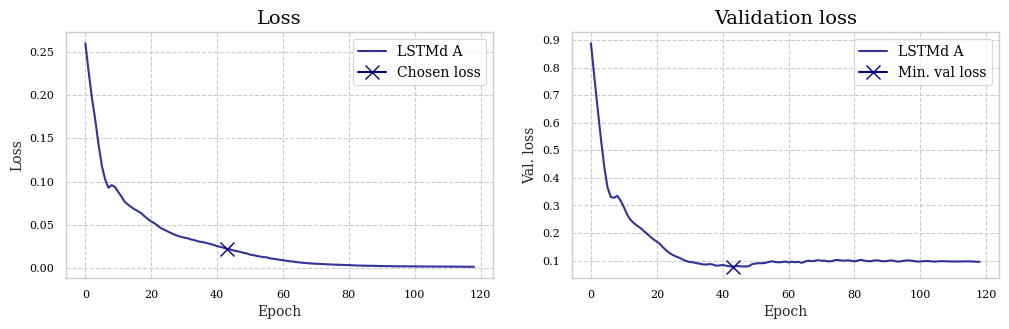

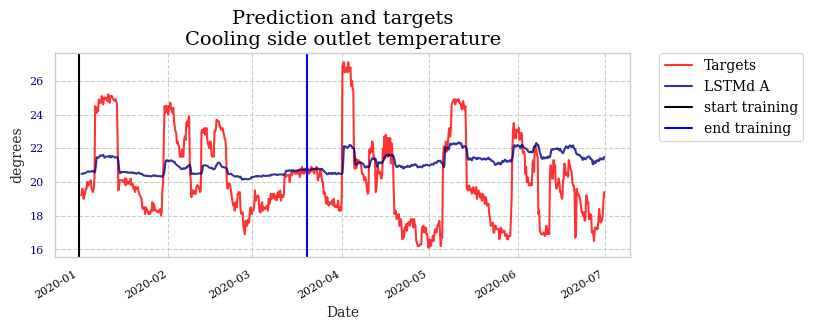

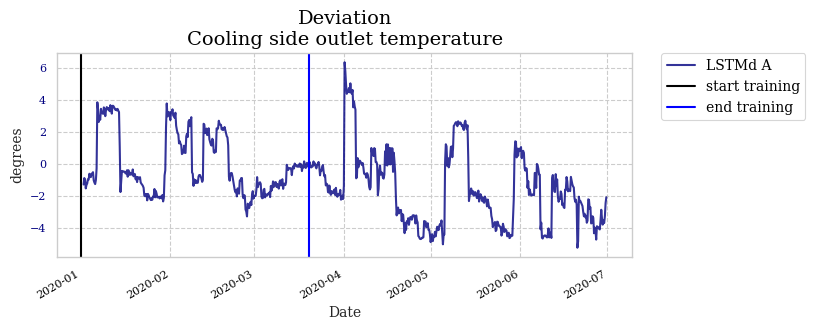

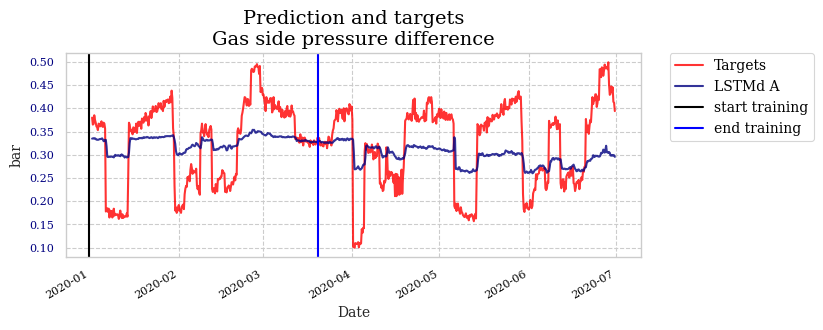

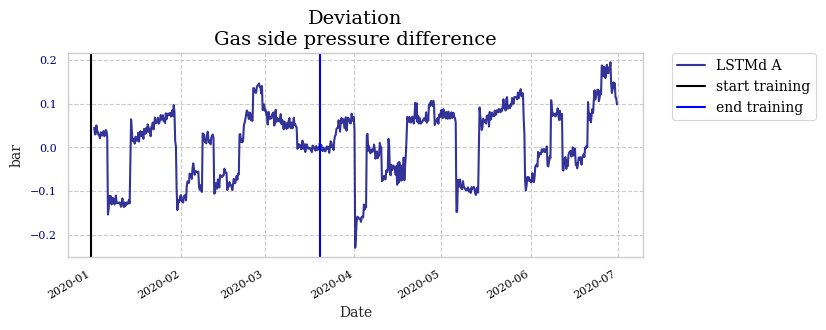

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 20PDT001 - Gas side pressure difference
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50TT002 - Cooling side outlet temperature
Col. 6 : 50TV001 - Cooling side valve opening

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 

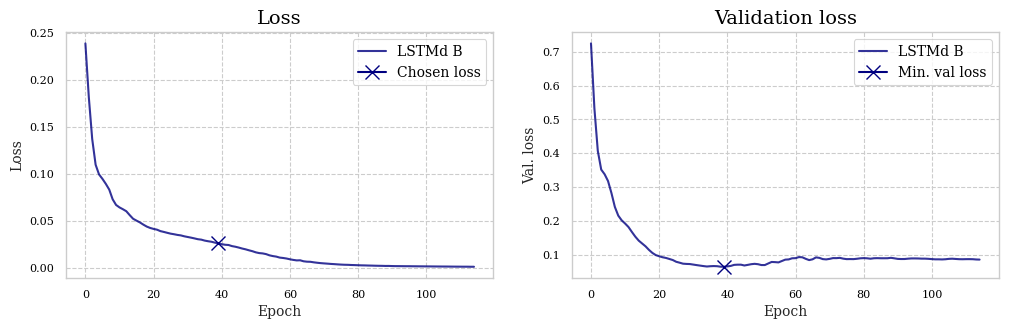

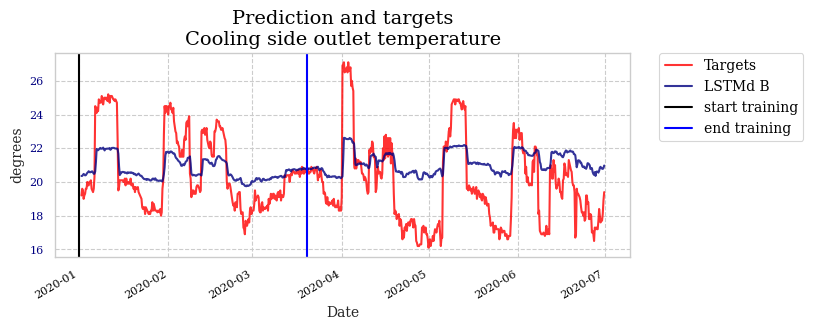

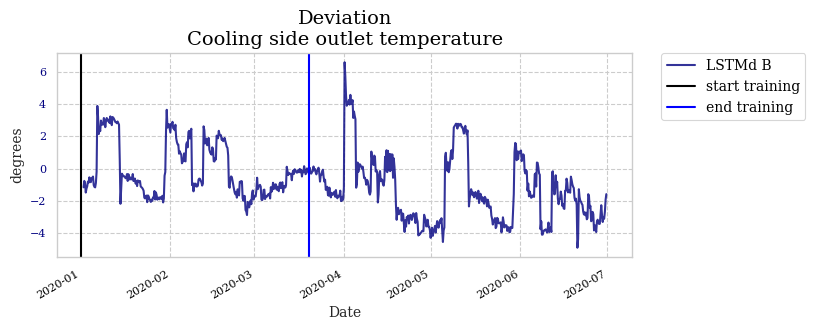

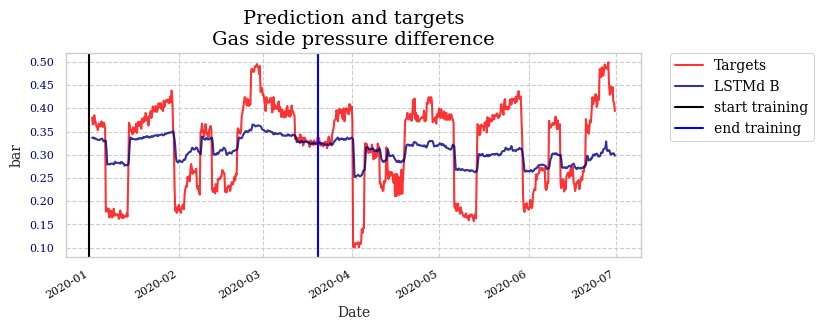

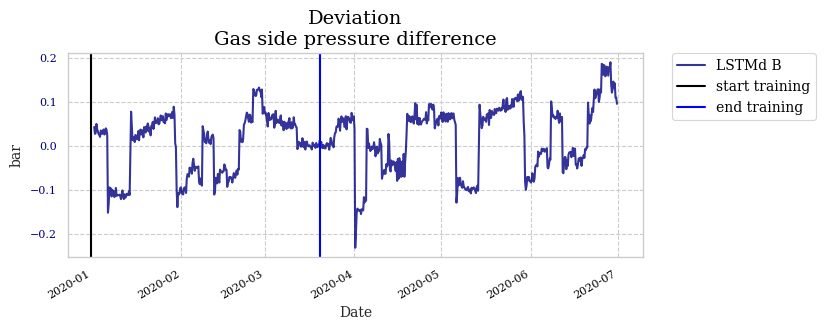

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 20PDT001 - Gas side pressure difference
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50FT001 - Cooling side flow
Col. 6 : 50TT002 - Cooling side outlet temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-

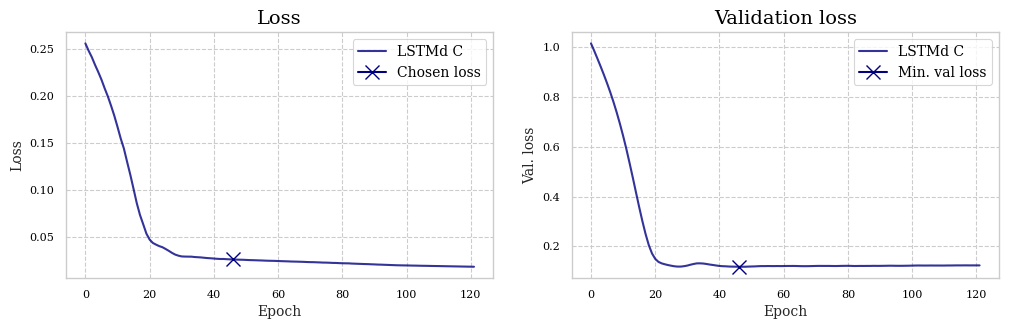

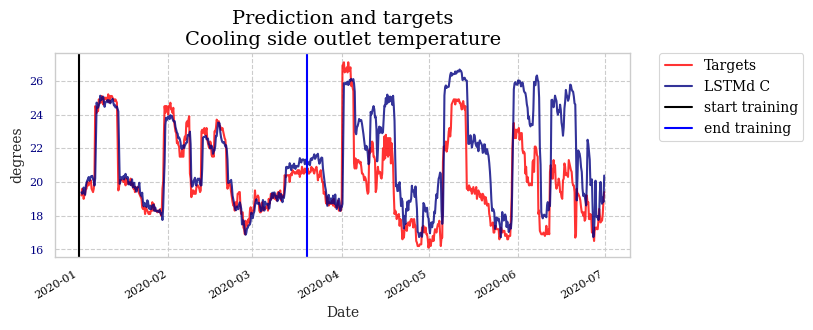

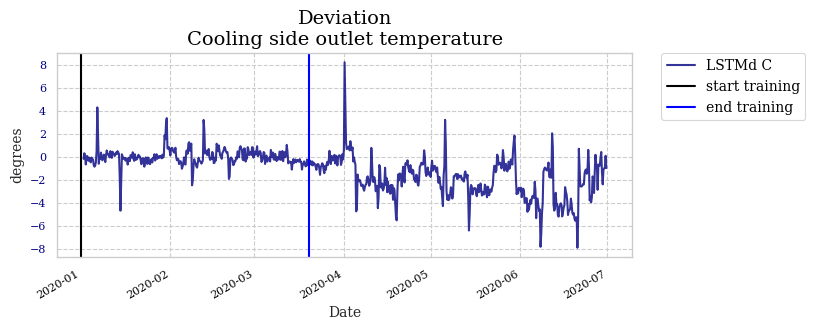

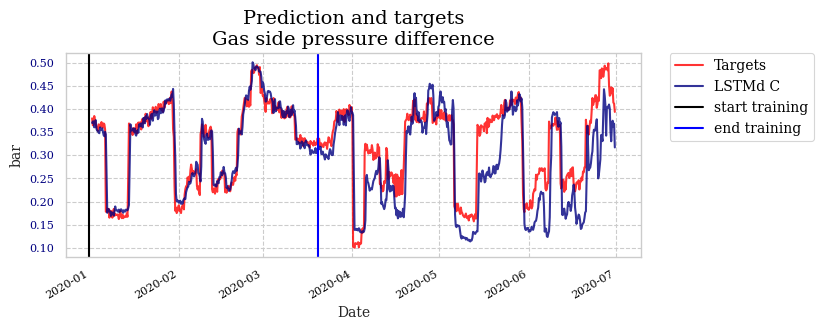

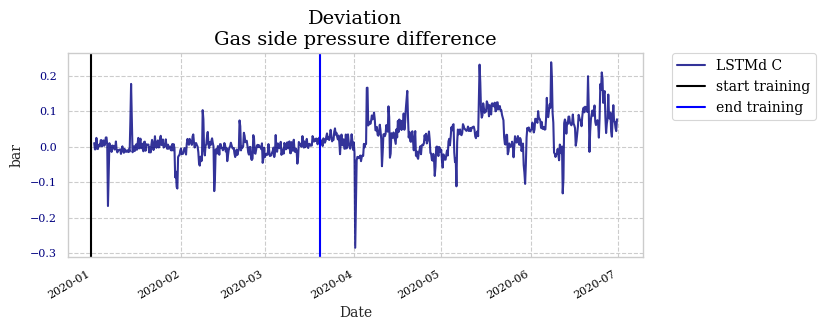

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 20PDT001 - Gas side pressure difference
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50PT001 - Cooling side inlet pressure
Col. 6 : 50TT002 - Cooling side outlet temperature
Col. 7 : 50TV001 - Cooling side valve opening

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 

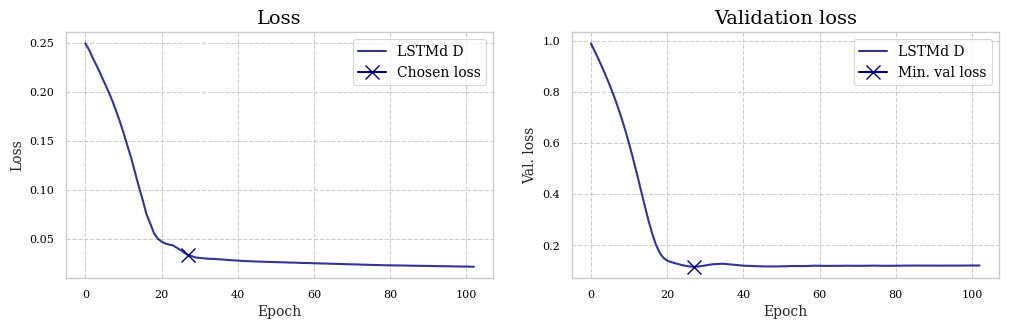

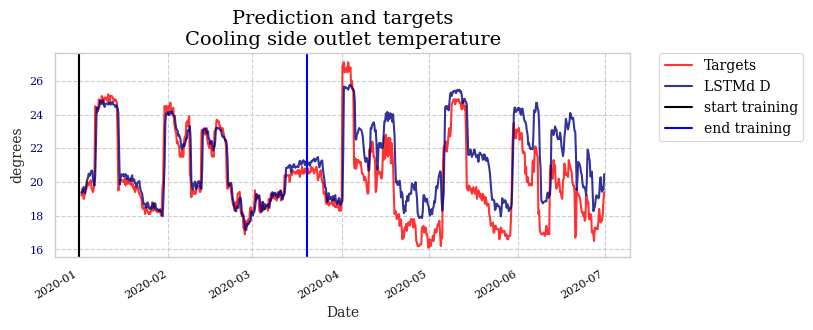

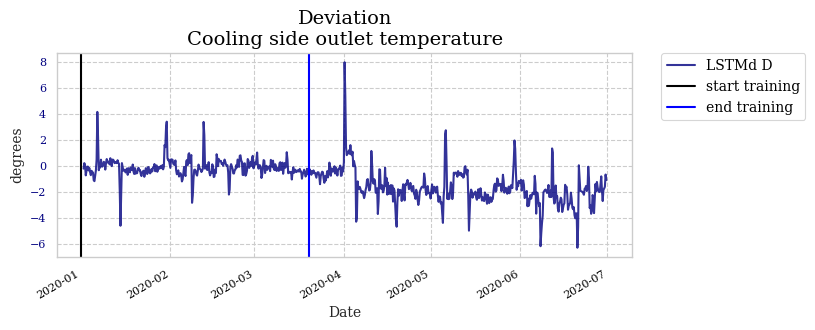

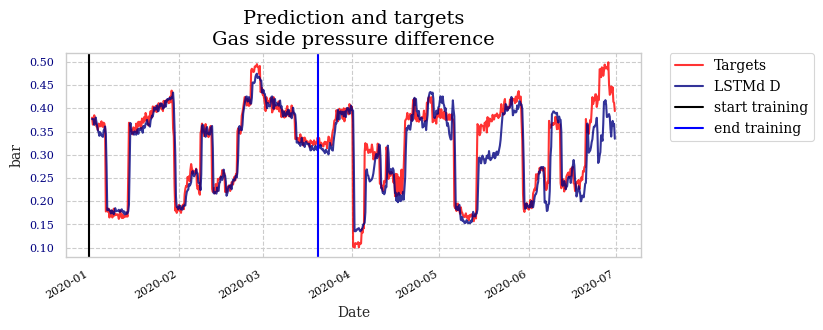

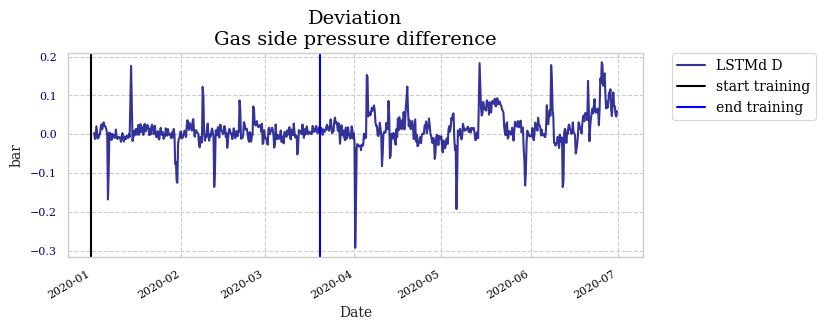

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 20PDT001 - Gas side pressure difference
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50PT001 - Cooling side inlet pressure
Col. 6 : 50FT001 - Cooling side flow
Col. 7 : 50TT002 - Cooling side outlet temperature
Col. 8 : 50TV001 - Cooling side valve opening

Finding data between 2020-01-01 00:00:

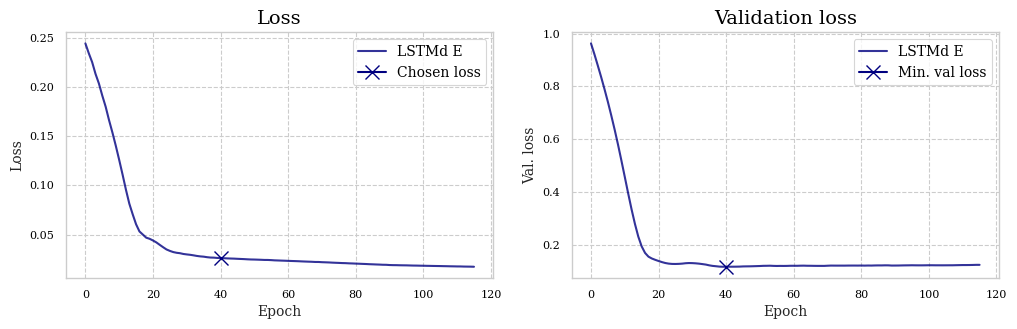

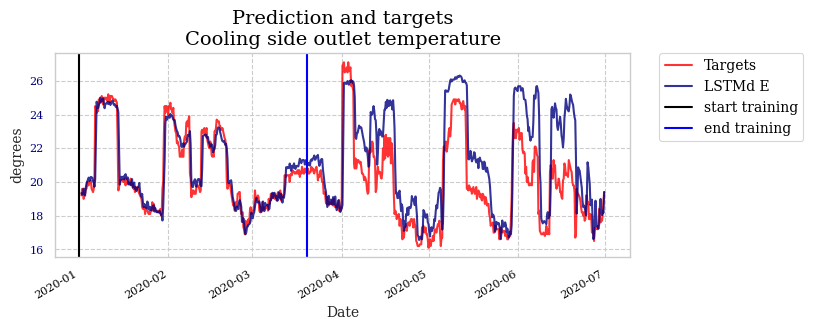

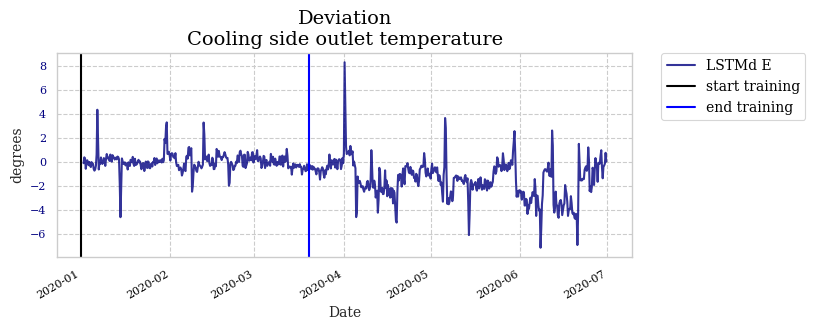

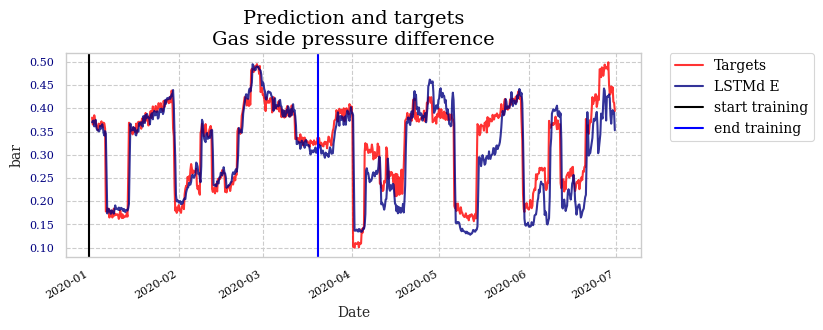

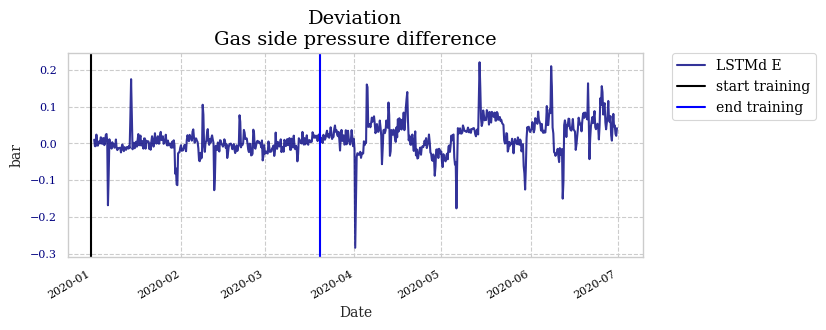

Model prediction scores
+---------+-------------+------------+
|  Model  | Train score | Test score |
+---------+-------------+------------+
| LSTMd A |    0.2871   |   0.1194   |
| LSTMd B |    0.4415   |   0.283    |
| LSTMd C |    0.8937   |   0.469    |
| LSTMd D |    0.8915   |   0.6534   |
| LSTMd E |    0.8953   |   0.6205   |
+---------+-------------+------------+


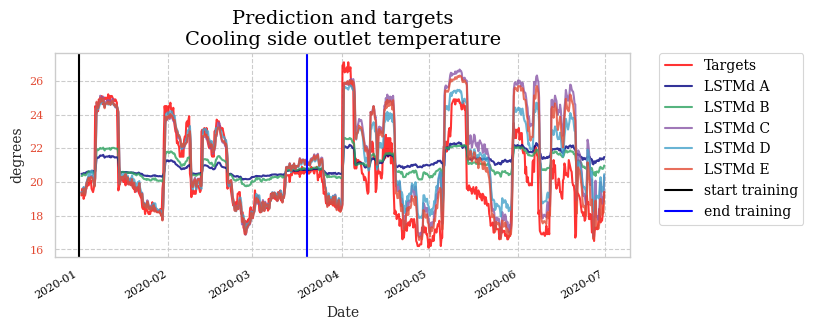

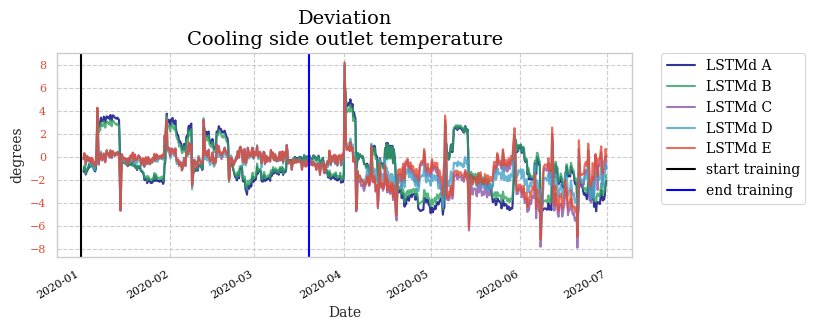

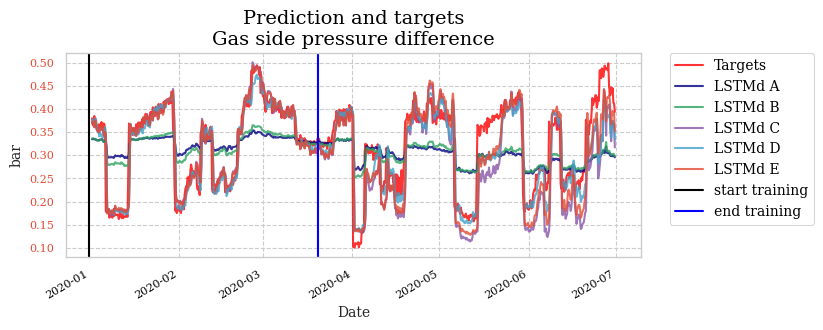

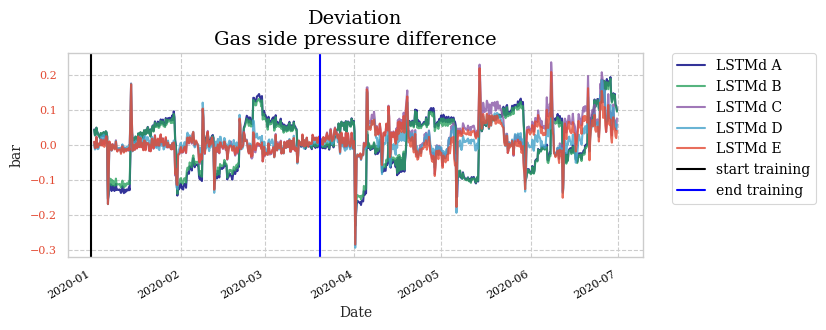

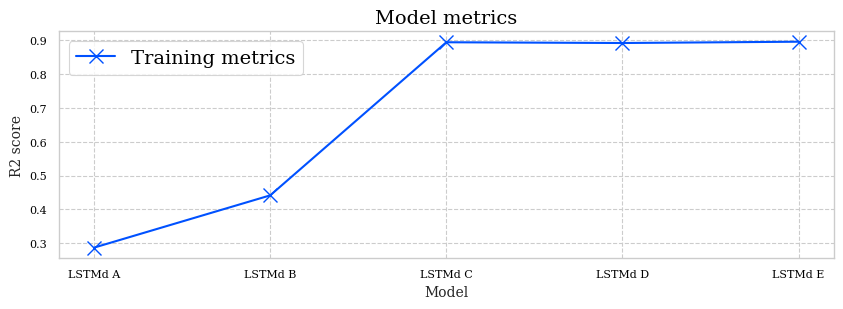

In [41]:
featureComparison(irrelevantColumnsList, filename, columns, traintime, testtime, targetColumns, 2)

In [42]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('F', None, '30min')
targetColumns = [
	'TT0653_MA_Y'
]
irrelevantColumnsList = [
	#  Target: C T out
	#  Featers: P T in, P T out, P flow, C T in 
	[
		'FT0111',
		'PDT0108_MA_Y',
		'PDT0119_MA_Y',
		'PDT0118_MA_Y',
		'TT0104_MA_Y',
		'TIC0103_CA_YX',
		'TI0115_MA_Y',
		'TT0652_MA_Y',
		'TIC0103_CA_Y',
		'PIC0104_CA_YX',
		'TIC0101_CA_Y',
		'TT0102_MA_Y',
		'TIC0101_CA_YX',
		'TT0651_MA_Y',
		'TIC0105_CA_Y',
	],
	#  Target: C T out
	#  Featers: P T in, P T out, P flow, C T in, C valve
	[
		'FT0111',
		'PDT0108_MA_Y',
		'PDT0119_MA_Y',
		'PDT0118_MA_Y',
		'TT0104_MA_Y',
		'TIC0103_CA_YX',
		'TI0115_MA_Y',
		'TT0652_MA_Y',
		'TIC0103_CA_Y',
		'PIC0104_CA_YX',
		'TIC0101_CA_Y',
		'TT0102_MA_Y',
		'TIC0101_CA_YX',
		'TT0651_MA_Y',
	],
]

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

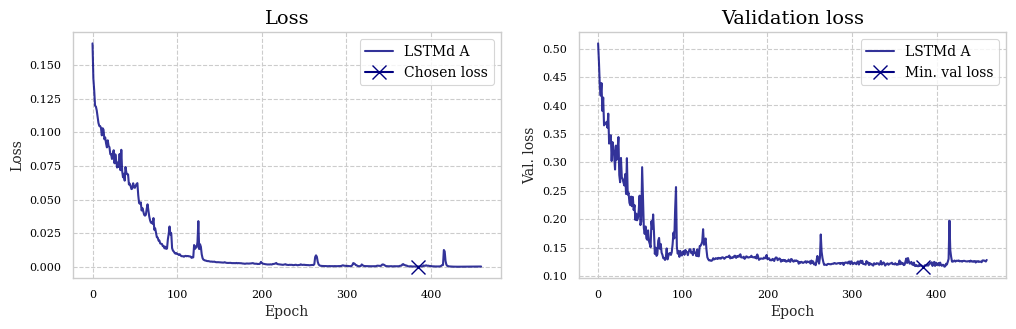

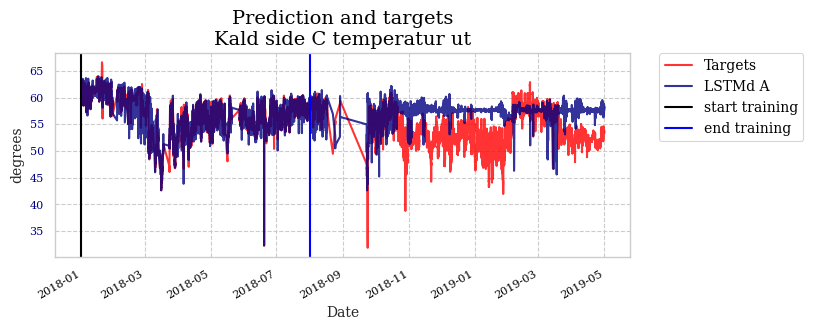

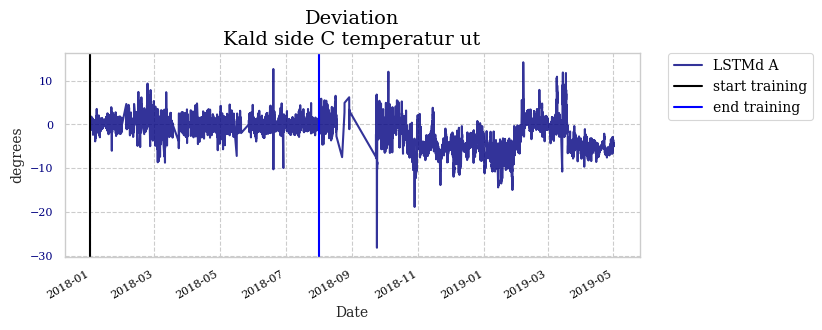

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

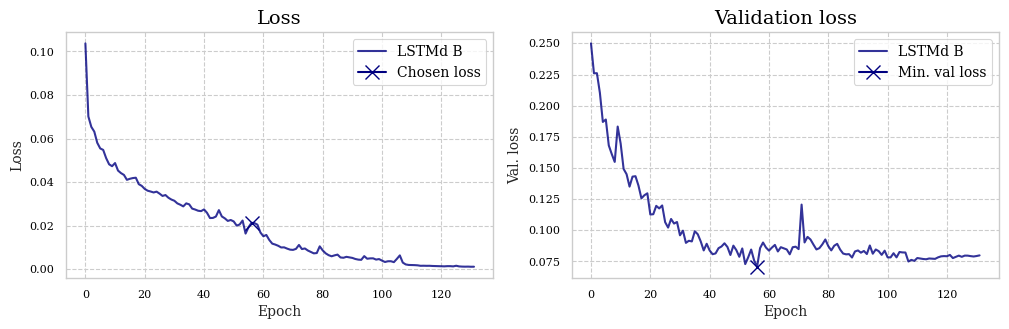

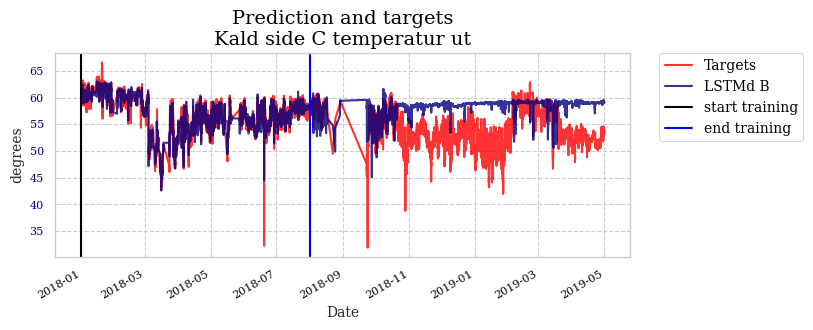

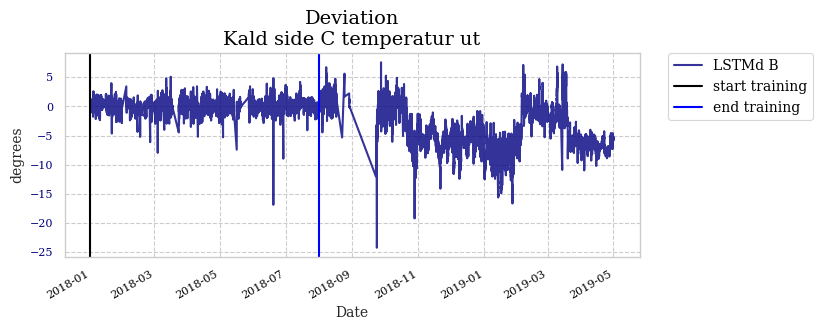

Model prediction scores
+---------+-------------+------------+
|  Model  | Train score | Test score |
+---------+-------------+------------+
| LSTMd A |    0.8891   |  -0.1004   |
| LSTMd B |    0.922    |   -0.427   |
+---------+-------------+------------+


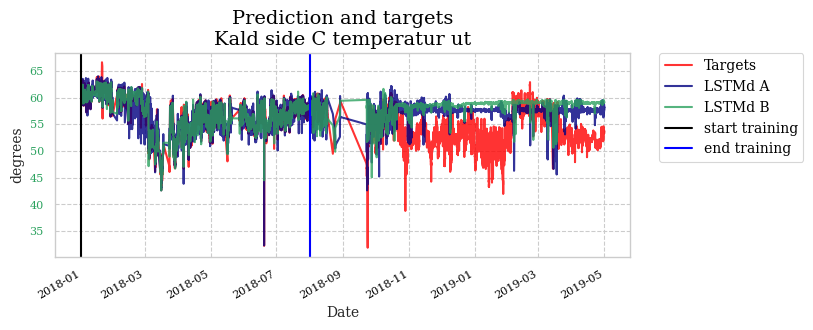

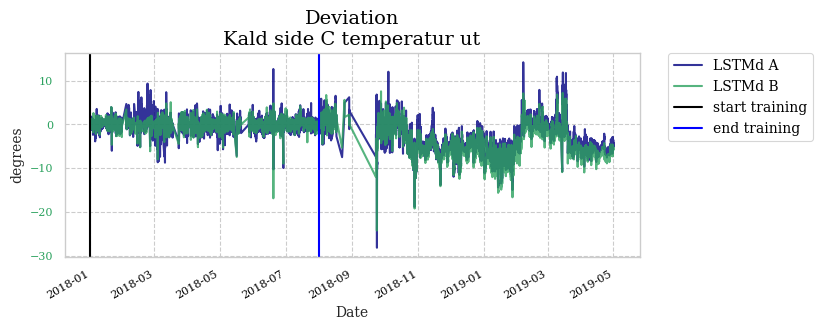

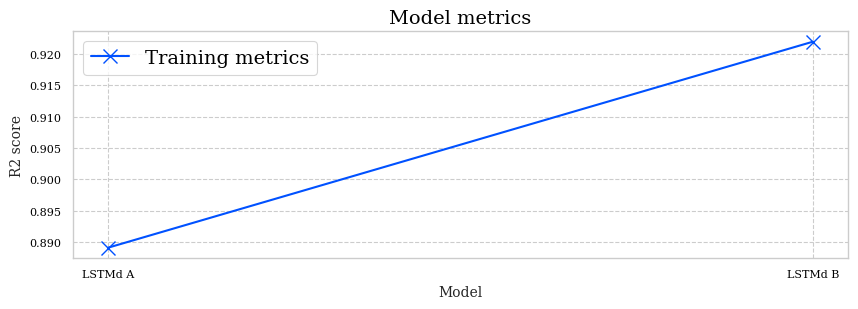

In [43]:
featureComparison(irrelevantColumnsList, filename, columns, traintime, testtime, targetColumns, 16)

In [44]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', None, '30min')
targetColumns = [
    'TT0026',
	'PDI0064',
]
irrelevantColumnsList = [
	#  Target: C T out, P dP
	#  Features: P T in, P T out, P flow, C T in 
	[
		'PDT0024',
		'FI0027',
		'TIC0022U',
		'PI0001',
	],
	#  Target: C T out, P dP
	#  Features: P T in, P T out, P flow, C T in, C valve
	[
		'PDT0024',
		'FI0027',
		'PI0001',
	],
	#  Target: C T out, P dP
	#  Features: P T in, P T out, P flow, C T in, C flow
	[
		'PDT0024',
		'TIC0022U',
		'PI0001',
	],
	#  Target: C T out, P dP
	#  Features: P T in, P T out, P flow, C T in, C P in, C valve
	[
		'PDT0024',
		'FI0027',
	],
	#  Target: C T out, P dP
	#  Features: P T in, P T out, P flow, C T in, C P in, C valve, C flow
	[
		'PDT0024',
	],
]

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Model LSTMd A was loaded from file
+---------+-----------+-------------+---------------+----

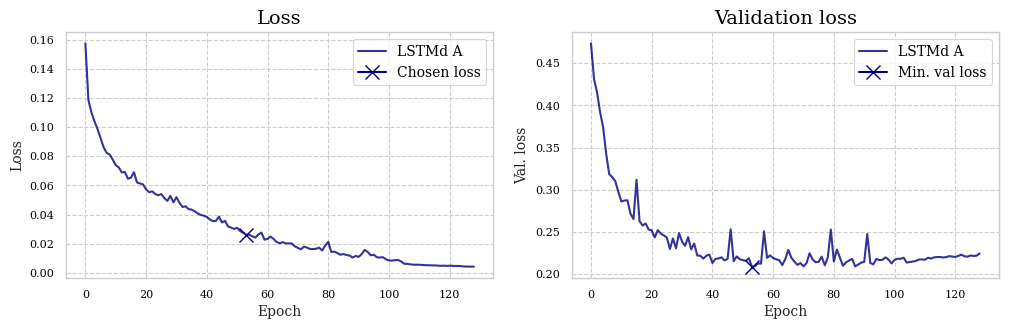

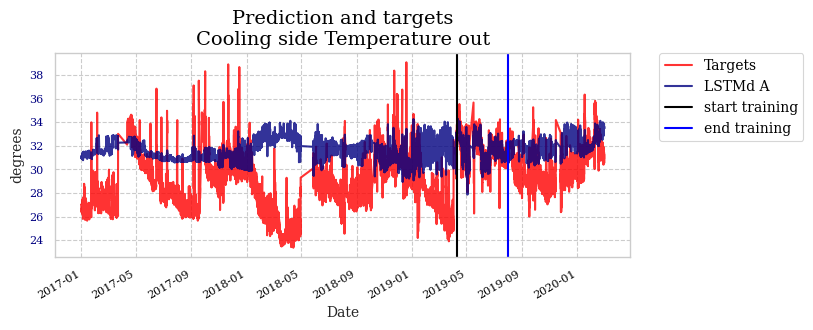

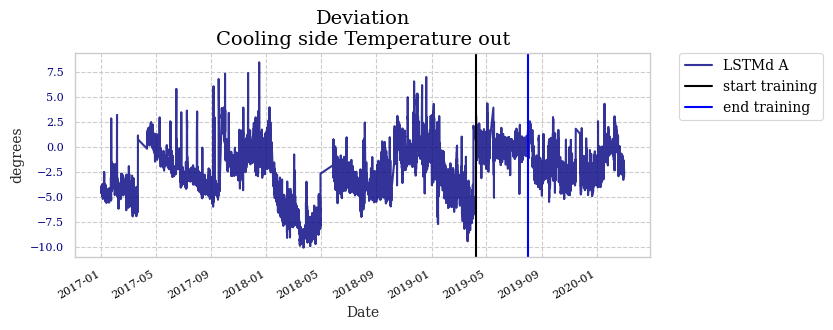

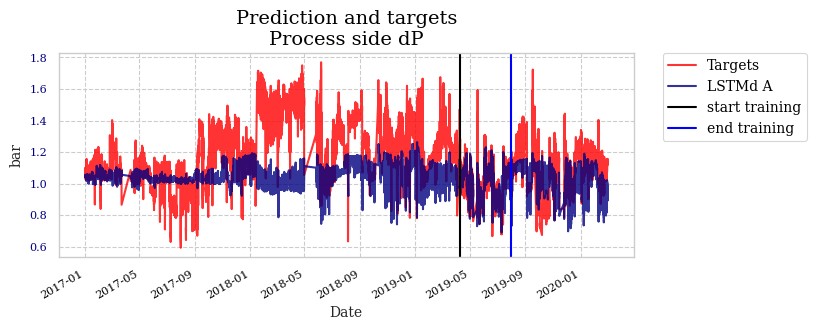

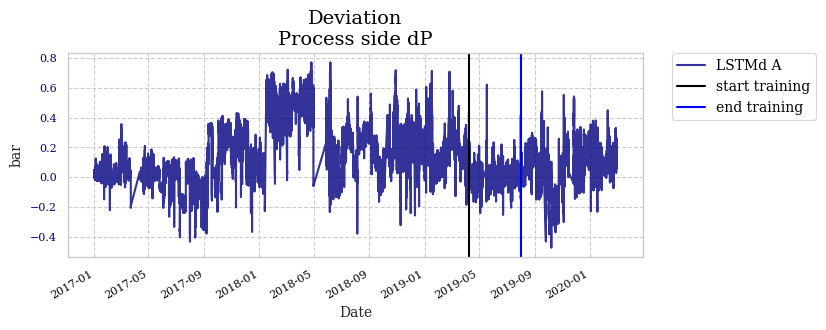

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : TIC0022U - Cooling side valve opening

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Model LSTMd B was loaded from file
+---------

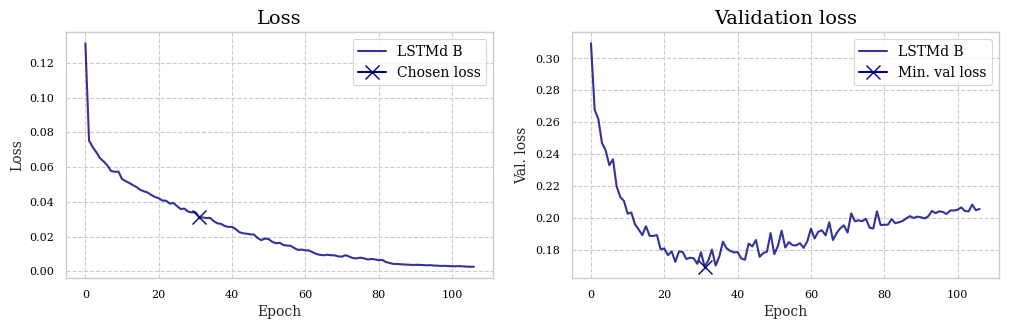

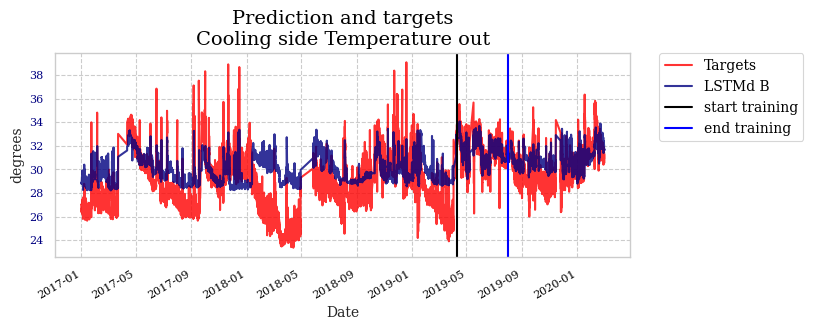

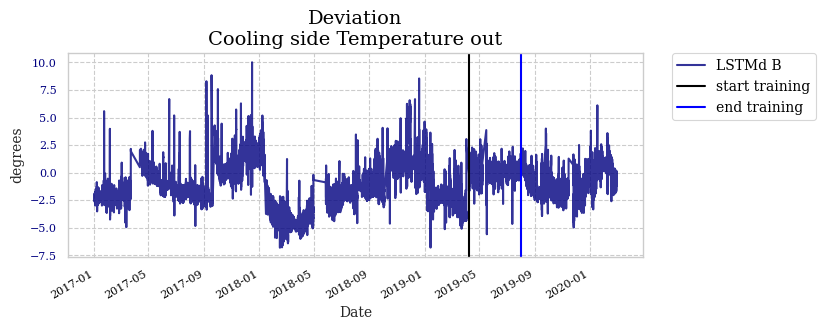

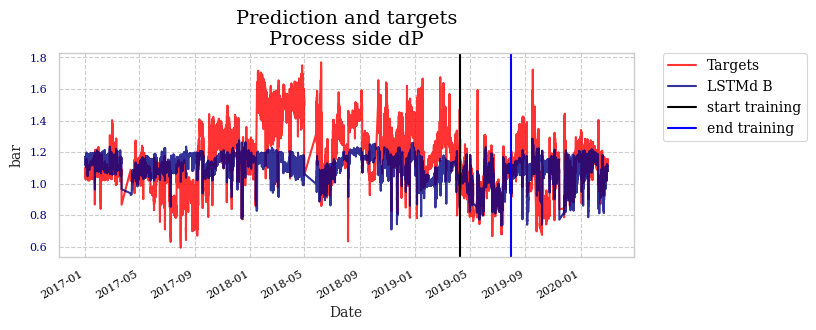

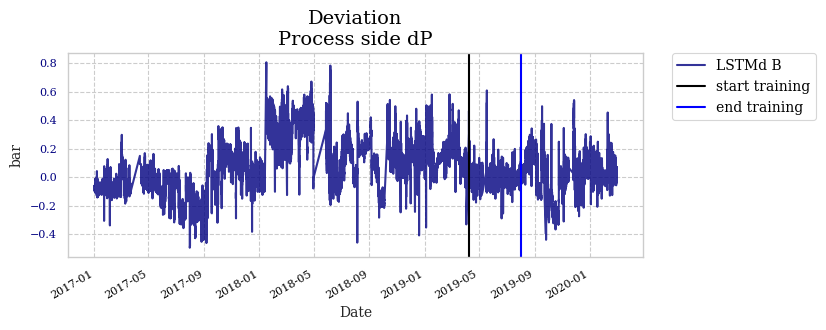

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : FI0027 - Cooling side flow rate

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Model LSTMd C was loaded from file
+---------+-----

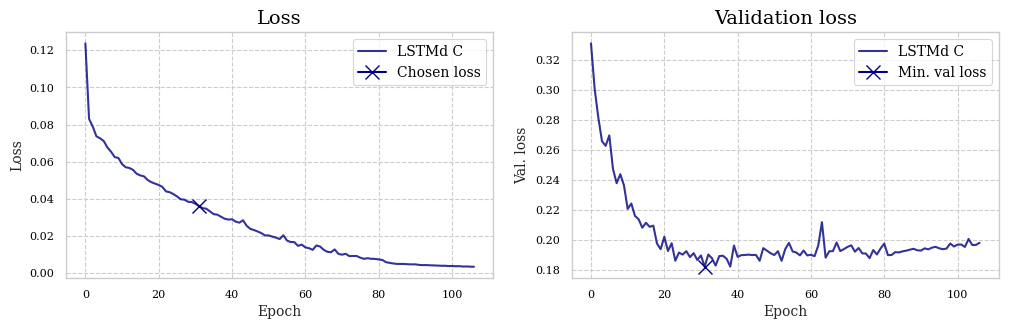

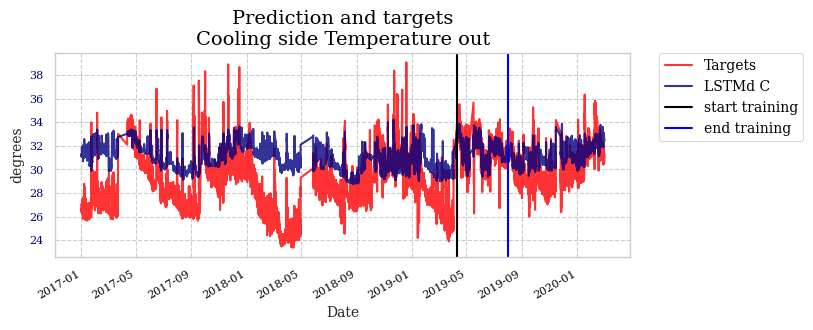

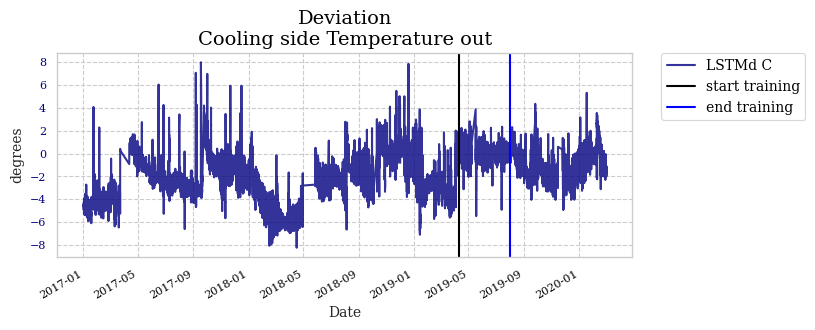

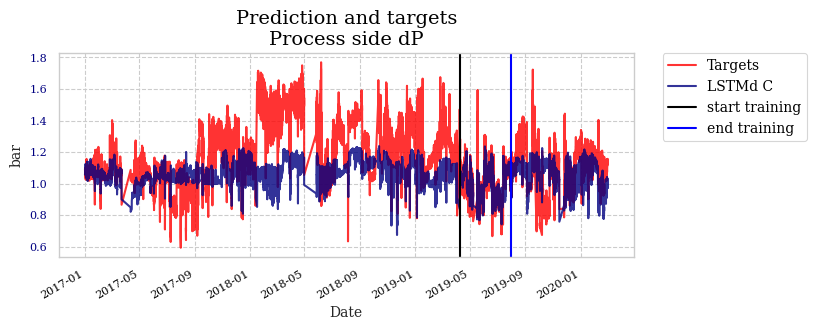

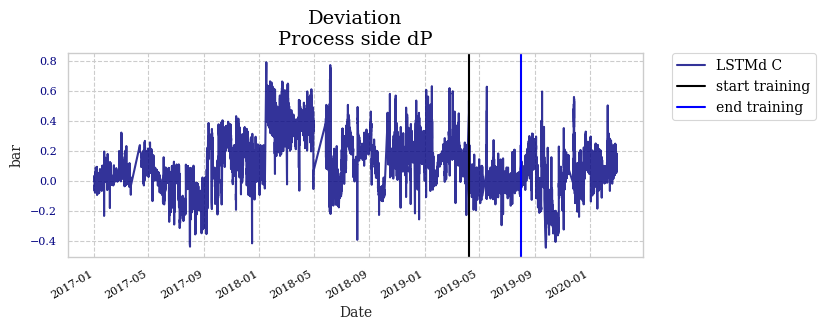

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : TIC0022U - Cooling side valve opening

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Mo

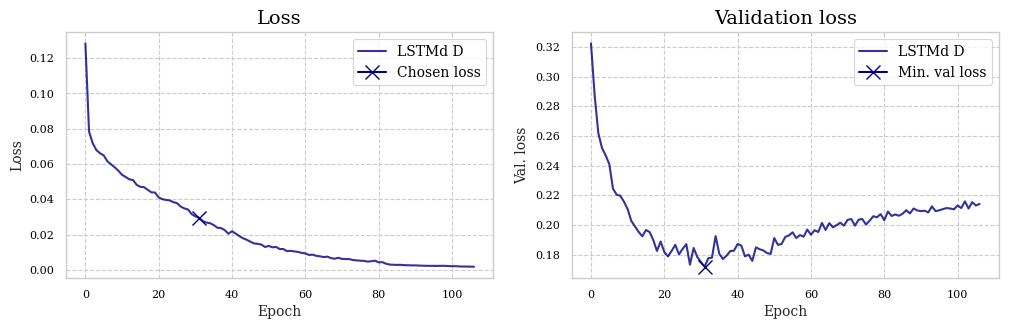

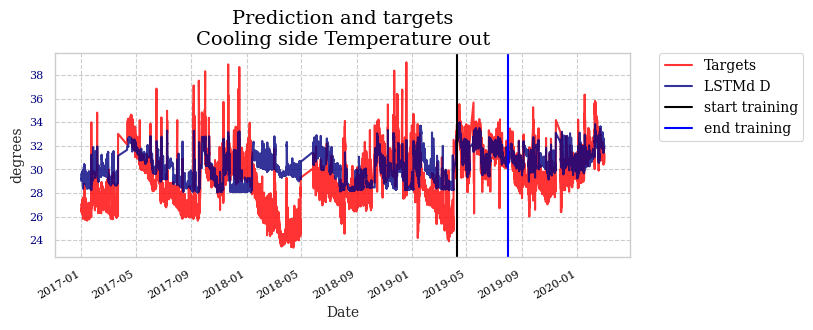

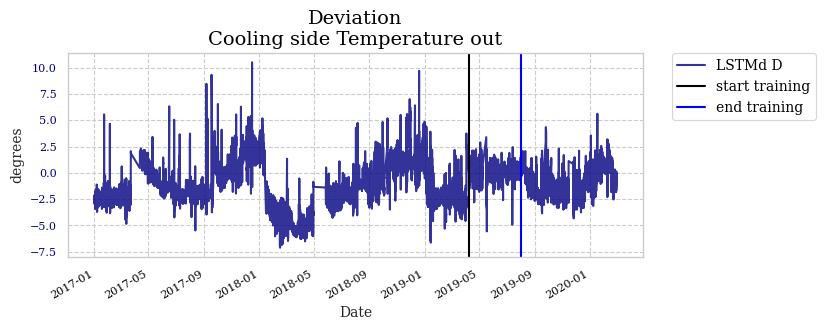

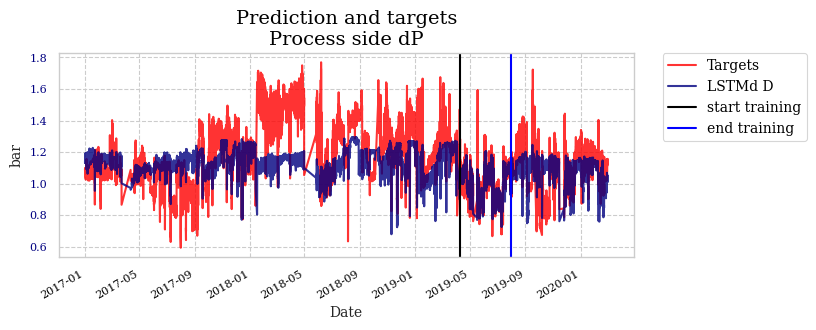

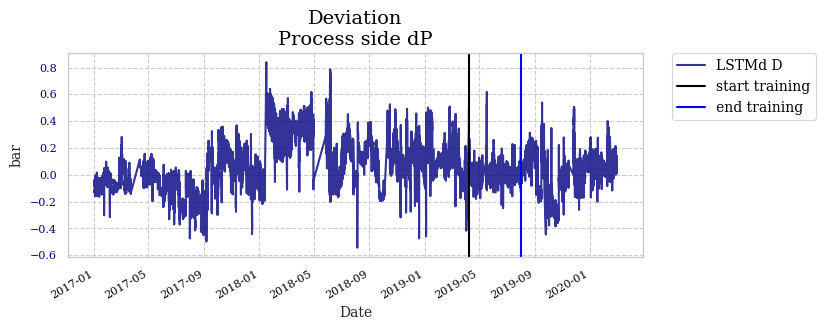

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and

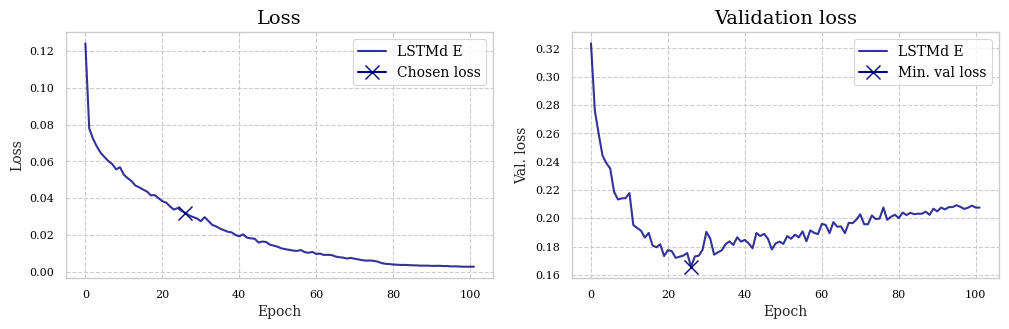

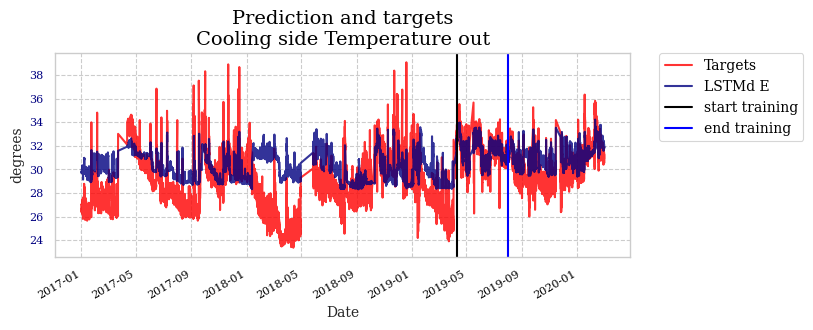

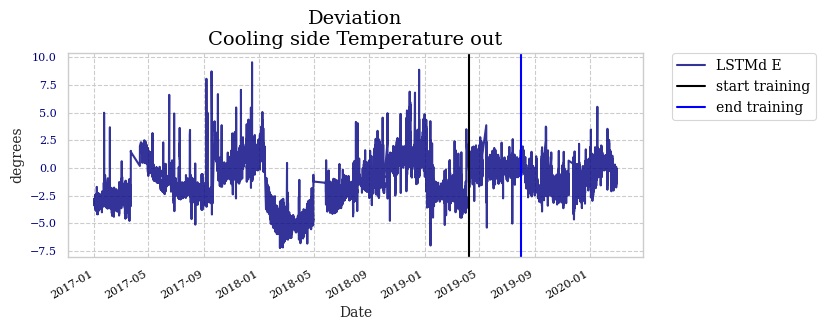

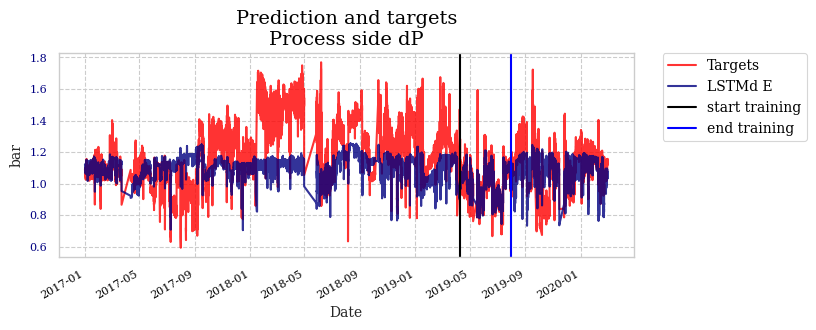

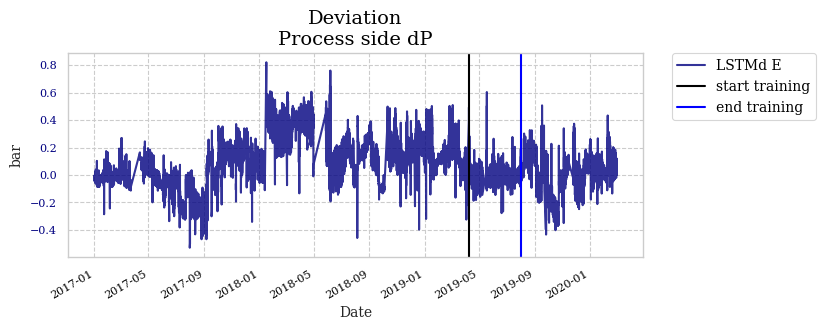

Model prediction scores
+---------+-------------+------------+
|  Model  | Train score | Test score |
+---------+-------------+------------+
| LSTMd A |    0.7877   |  -1.0286   |
| LSTMd B |    0.823    |   0.0809   |
| LSTMd C |     0.81    |  -0.3314   |
| LSTMd D |    0.8243   |   0.0761   |
| LSTMd E |    0.8307   |   0.0143   |
+---------+-------------+------------+


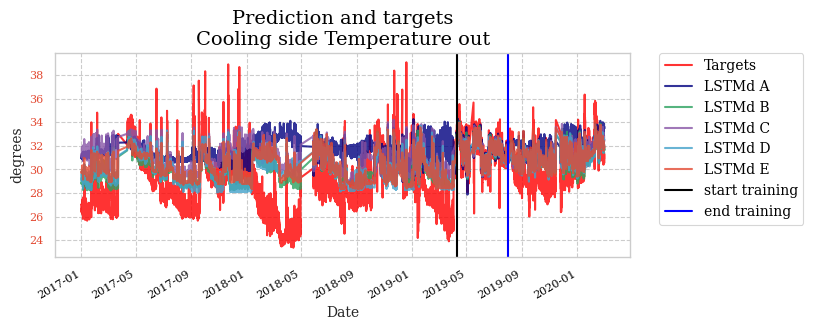

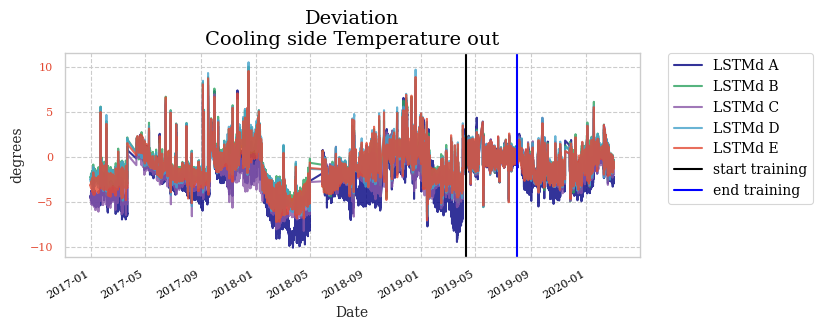

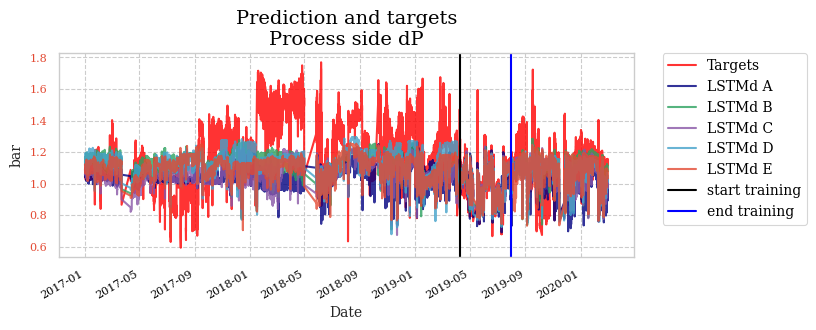

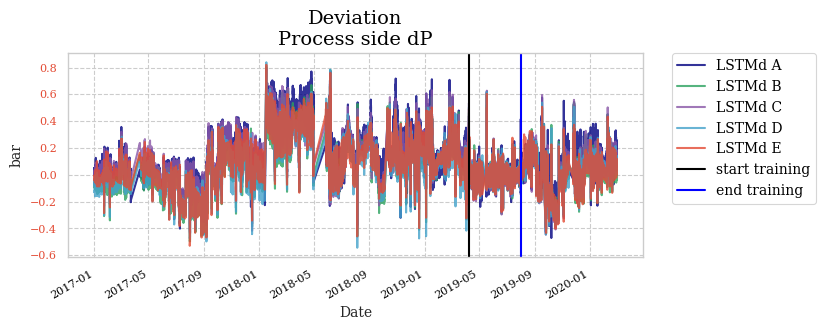

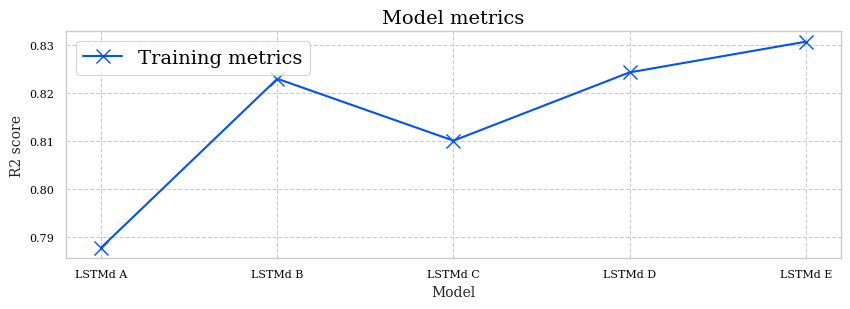

In [45]:
featureComparison(irrelevantColumnsList, filename, columns, traintime, testtime, targetColumns, 16)